<a href="https://colab.research.google.com/github/Lili1199/ISAD5001-Group10/blob/main/Development_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cardiovascular Health Analysis**

Cardiovascular health plays an important role in overall well-being, with heart disease and stroke being among the leading causes of death globally. Understanding how lifestyle choices, medical factors, and demographics influence cardiovascular health can help reduce risks and improve quality of life.

In this project, we’ll dive into a cardiac health dataset to uncover meaningful insights about how factors like age, gender, cholesterol levels, smoking habits, and physical activity relate to cardiovascular disease.

By leveraging Python in Google Colab, we’ll work through:

* Exploring and Connecting Data: Accessing the dataset from an SQLite database.
* Cleaning and Preprocessing: Getting the data ready for analysis.
* Visualizing Key Trends: Creating charts to understand patterns and relationships better.
* Analyzing Factors: Investigating how demographic, clinical, and lifestyle factors impact heart health.
* Following Best Practices: Writing clear, well-documented code focusing on industry standards.


Through this analysis, we aim to provide actionable insights that could contribute to better heart health and preventative strategies.



---



---



**Step 1**

SQLite Database Connect and Load the data.

* Connect to the SQLite database.
* Data from the medical_examination table will be selected using query.
* Pandas will be used to read and load data into DataFrame.


In [ ]:
# Step 1: Connect to SQLite Database and Load Data
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('cardiohealth.db')

# Query the medical_examination table
query = "SELECT * FROM medical_examination"

# Load data into a pandas DataFrame
data = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the first few rows to check the data
data.head()

#The code initiates the connection to SQLite database, retrive data from ttable medical_examination and loads it into a DataFrame.

DatabaseError: Execution failed on sql 'SELECT * FROM medical_examination': no such table: medical_examination

**Step 2**

 Check for missing or empty values ​​before data transformation.

In [ ]:
# Check missing values
missing_data = data.isnull().sum()
print(missing_data)

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


*Detecting outliers*

In [ ]:
# Summary statistics
print(data[['height', 'weight', 'ap_hi', 'ap_lo']].describe())

# Define ranges
plausible_height_range = (120, 220)  # heights should be between 120cm and 220cm
plausible_weight_range = (30, 200)   # weights should be between 30kg and 200kg
plausible_ap_hi_range = (80, 200)    # systolic BP should be between 80 and 200
plausible_ap_lo_range = (40, 120)    # diastolic BP should be between 40 and 120

# remove outliers
data = data[(data['height'].between(*plausible_height_range)) &
            (data['weight'].between(*plausible_weight_range)) &
            (data['ap_hi'].between(*plausible_ap_hi_range)) &
            (data['ap_lo'].between(*plausible_ap_lo_range))]

print("Outliers removed, dataset now has", len(data), "rows")

             height        weight         ap_hi         ap_lo
count  70000.000000  70000.000000  70000.000000  70000.000000
mean     164.359229     74.205690    128.817286     96.630414
std        8.210126     14.395757    154.011419    188.472530
min       55.000000     10.000000   -150.000000    -70.000000
25%      159.000000     65.000000    120.000000     80.000000
50%      165.000000     72.000000    120.000000     80.000000
75%      170.000000     82.000000    140.000000     90.000000
max      250.000000    200.000000  16020.000000  11000.000000
Outliers removed, dataset now has 68563 rows




---


**Step 3**

Data Conversion

* Data will be preprocessed where Age given in days will be converted to Years.
* Add a new column age_years by converting the age from days to years.

After the execution of code, the age will be converted to years from days and a new column will be added that shows age in years.


In [ ]:

# Preprocess Data (Convert age from days to years)
data['age_years'] = (data['age'] / 365).astype(int)

# Display the first few rows to check the age_years column
data[['age', 'age_years']].head()



,age,age_years
0,18393,50
1,20228,55
2,18857,51
3,17623,48
4,17474,47




---


**Step 4**

Demographic and Lifestyle Analysis

Here, the data will be grouped by gender and smoking status. Mean cardiovascular disease presence (cardio) is calculated for each group while gender and smoking values will be converted into more understandable labels.

* Group data by gender and smoke status.
* Calculate the average cardio score for each group.
* Replace numerical values for gender and smoke with readable labels.


In [ ]:
# Step 3: Analyze Gender and Smoking (Demographic + Lifestyle)
gender_smoking = data.groupby(['gender', 'smoke'])['cardio'].mean().reset_index()
gender_smoking['gender'] = gender_smoking['gender'].replace({1: 'Female', 2: 'Male'})
gender_smoking['smoke'] = gender_smoking['smoke'].replace({0: 'Non-Smoker', 1: 'Smoker'})

# Display the grouped data
gender_smoking


,gender,smoke,cardio
0,Female,Non-Smoker,0.492215
1,Female,Smoker,0.469773
2,Male,Non-Smoker,0.508013
3,Male,Smoker,0.467138
4,3,Non-Smoker,0.363636


*From the analysis, smokers have a higher/lower rate of cardiovascular disease than non-smokers, and men/women are more affected.”*



---


**Step 5**

Data visualization

Visualization of gender and Smoking Influence on Cardiovascular Disease

On this step we will visualize and show relation between smoking and gender and its impact on cardiovascular disease. The risk difference between gender and smoking status also can be seen.

* Use Matplotlob to create a bar chart.
* Plot smoke status on the x-axis and the average cardio on the y-axis for each gender.

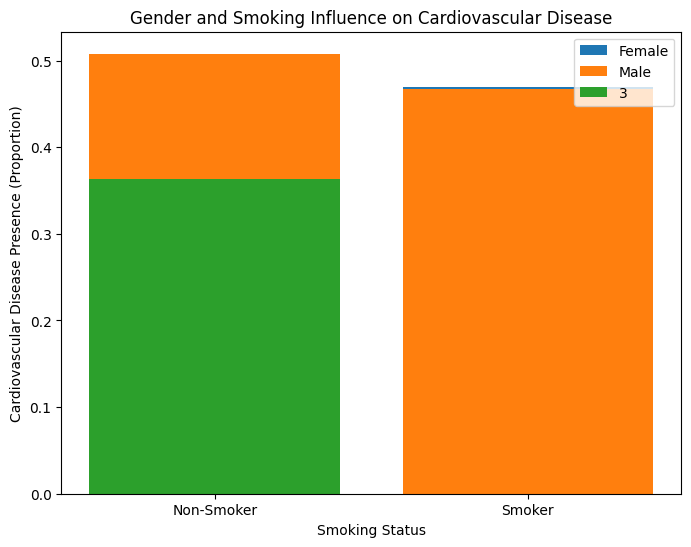

In [ ]:
# Step 4: Visualize Gender and Smoking Influence on Cardiovascular Disease
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for gender in gender_smoking['gender'].unique():
    subset = gender_smoking[gender_smoking['gender'] == gender]
    plt.bar(subset['smoke'], subset['cardio'], label=gender)

plt.xlabel('Smoking Status')
plt.ylabel('Cardiovascular Disease Presence (Proportion)')
plt.title('Gender and Smoking Influence on Cardiovascular Disease')
plt.legend()
plt.show()




---

**Step 6**

Here we will group individuals by their age and cholestrol levels and also calculate the average presence of cardiovascular disease for each group.

* Create age group by binning the age_years column.
* Group the data by age_group and cholesterol levels.
* calculate mean cardiovascular disease presence for each combination.

In [ ]:
# Step 5: Analyze Age Group and Cholesterol (Demographic + Clinical)
bins = [0, 30, 40, 50, 60, 100]
labels = ['<30', '30-40', '40-50', '50-60', '60+']
data['age_group'] = pd.cut(data['age_years'], bins=bins, labels=labels)

# Adding observed=False to retain the current behavior and silence the warning
age_cholesterol = data.groupby(['age_group', 'cholesterol'], observed=False)['cardio'].mean().reset_index()
age_cholesterol['cholesterol'] = age_cholesterol['cholesterol'].replace({1: 'Normal', 2: 'Above Normal', 3: 'Well Above Normal'})

# Display the grouped data
age_cholesterol


,age_group,cholesterol,cardio
0,<30,Normal,0.000000
1,<30,Above Normal,NaN
2,<30,Well Above Normal,NaN
3,30-40,Normal,0.190195
4,30-40,Above Normal,0.405556
5,30-40,Well Above Normal,0.508333
6,40-50,Normal,0.336250
7,40-50,Above Normal,0.541528
8,40-50,Well Above Normal,0.731818
9,50-60,Normal,0.475226




---
**Step 7**

Visualization of Age group and Cholestrol Onfluence on Cardiovasculat Disease

Here we will plot a line that will visualize how cholestrol levels and age group are related with cardiovascular disease.

* Use matplotlib to create a line plot.
* Plot cholestrol levels on the x-axis and mean cardio on  the y-axis for each group of age.


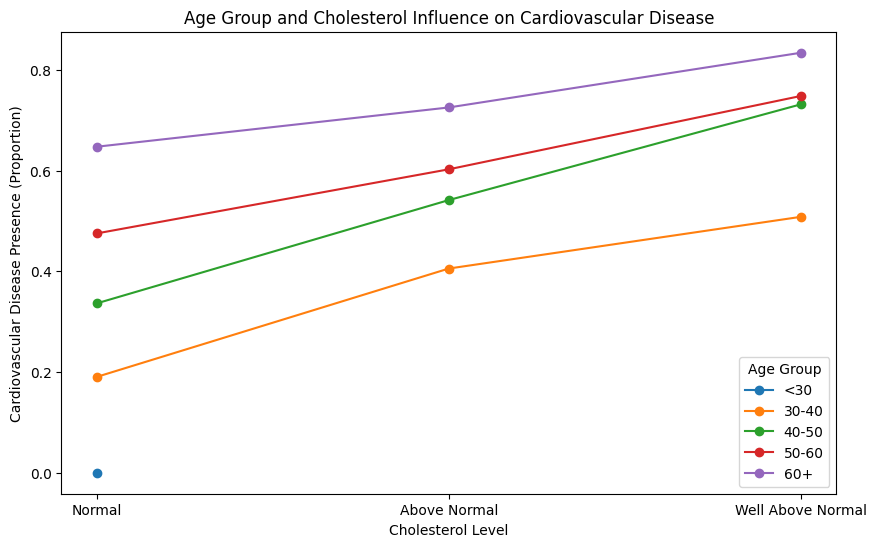

In [ ]:
# Step 6: Visualize Age Group and Cholesterol Influence on Cardiovascular Disease
plt.figure(figsize=(10, 6))
for age_group in age_cholesterol['age_group'].unique():
    subset = age_cholesterol[age_cholesterol['age_group'] == age_group]
    plt.plot(subset['cholesterol'], subset['cardio'], marker='o', label=age_group)

plt.xlabel('Cholesterol Level')
plt.ylabel('Cardiovascular Disease Presence (Proportion)')
plt.title('Age Group and Cholesterol Influence on Cardiovascular Disease')
plt.legend(title='Age Group')
plt.show()




---
**Step 8**

Gulcose Level and Physical Activity Analysis

Here, we will calculate the cardiovascular disease presence based on gulcose level and physical activity status.

* Group the data by age_group, gluc (gulcose level) and active status.
* Calculate the mean cardio score for each group. The mean cardiovascular disease presence (cardio score) is calculated for each combination of age group, glucose level, and physical activity status. This allows us to see how the combination of these factors correlates with cardiovascular disease.


In [ ]:
#Analyze Glucose Levels and Physical Activity (Demographic + Clinical + Lifestyle)
glucose_activity = data.groupby(['age_group', 'gluc', 'active'], observed=True)['cardio'].mean().reset_index()

# Display the grouped data
glucose_activity


,age_group,gluc,active,cardio
0,<30,1,1,0.000000
1,30-40,1,0,0.230519
2,30-40,1,1,0.206739
3,30-40,2,0,0.333333
4,30-40,2,1,0.385542
5,30-40,3,0,0.296296
6,30-40,3,1,0.287129
7,40-50,1,0,0.412172
8,40-50,1,1,0.363052
9,40-50,2,0,0.564460




---
**Step 9**

Visualize Glucose Levels and Physical Activity Influence on Cardiovascular Disease (Grouped Bar Chart)

Here we will create a grouped bar chart and visualize how gulcose level and physical activity influence cardiovascular disease acrooss different age group.

* Use matplotlib to create a line plot.
* Group data by age_group, gluc and active.
* Create bars for active and inactive in each age group.
* Plot the graph. x-axis represents glucose level and y axis represents proportion of individuals with cardiovascular disease.




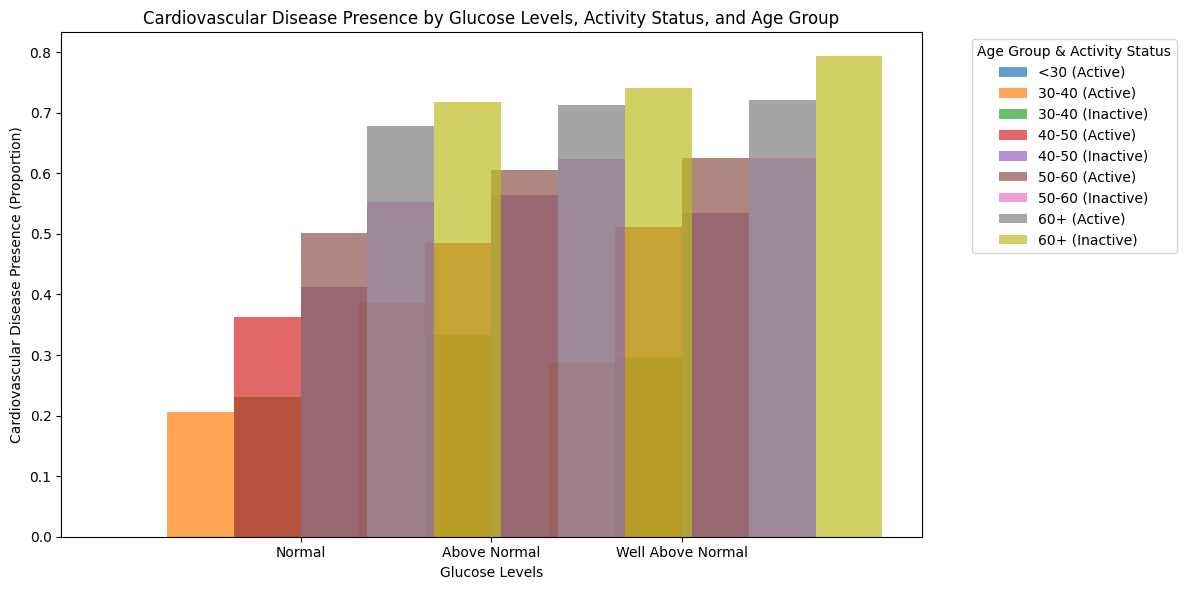

In [ ]:
#Visualize Glucose Levels and Physical Activity Influence on Cardiovascular Disease (Grouped Bar Chart)
import numpy as np

# Set up the plot
plt.figure(figsize=(12, 6))

# Define positions for the bars (grouped by age group and activity status)
age_groups = glucose_activity['age_group'].unique()
gluc_levels = [1, 2, 3]  # Glucose levels: 1 = Normal, 2 = Above Normal, 3 = Well Above Normal
bar_width = 0.35  # Width of the bars
positions = np.arange(len(gluc_levels))

# Plot bars for each age group and activity status (Active vs Inactive)
for idx, age_group in enumerate(age_groups):
    subset_active = glucose_activity[(glucose_activity['age_group'] == age_group) & (glucose_activity['active'] == 1)]
    subset_inactive = glucose_activity[(glucose_activity['age_group'] == age_group) & (glucose_activity['active'] == 0)]

    # Plot bars for active individuals
    plt.bar(positions + idx * bar_width, subset_active['cardio'], width=bar_width, label=f'{age_group} (Active)', alpha=0.7)

    # Plot bars for inactive individuals only if data exists

    if not subset_inactive.empty:
        plt.bar(positions + idx * bar_width + bar_width, subset_inactive['cardio'], width=bar_width, label=f'{age_group} (Inactive)', alpha=0.7)
# Set the x-axis labels and ticks
plt.xticks(positions + bar_width * len(age_groups) / 2, ['Normal', 'Above Normal', 'Well Above Normal'])
plt.xlabel('Glucose Levels')
plt.ylabel('Cardiovascular Disease Presence (Proportion)')
plt.title('Cardiovascular Disease Presence by Glucose Levels, Activity Status, and Age Group')
plt.legend(title='Age Group & Activity Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

